### Question 2: Salary
Is that true that software engineer make more money than Data scientist or data analyst?
Let's compare the annual salary between software engineer, data scientist and data analyst in the stackoverflow survey data.

In [1]:
# setup
import pandas as pd
import numpy as np
import clean_data as c
import os


# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
import seaborn as sns

# Where to save the figures
PROJECT_ROOT_DIR = "."
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images")
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [2]:
# load data produced by prepare_data.ipynb
data = pd.read_pickle('data') # data from 2018 and 2019
print(data.columns)

Index(['Respondent', 'is_DS_ML', 'is_DA', 'is_DEV', 'is_full_time',
       'is_student', 'edlevel', 'major', 'salary', 'salary_freq', 'country',
       'salary_annual', 'company_size', 'JobSat', 'year'],
      dtype='object')


Saving figure Salary_distribution


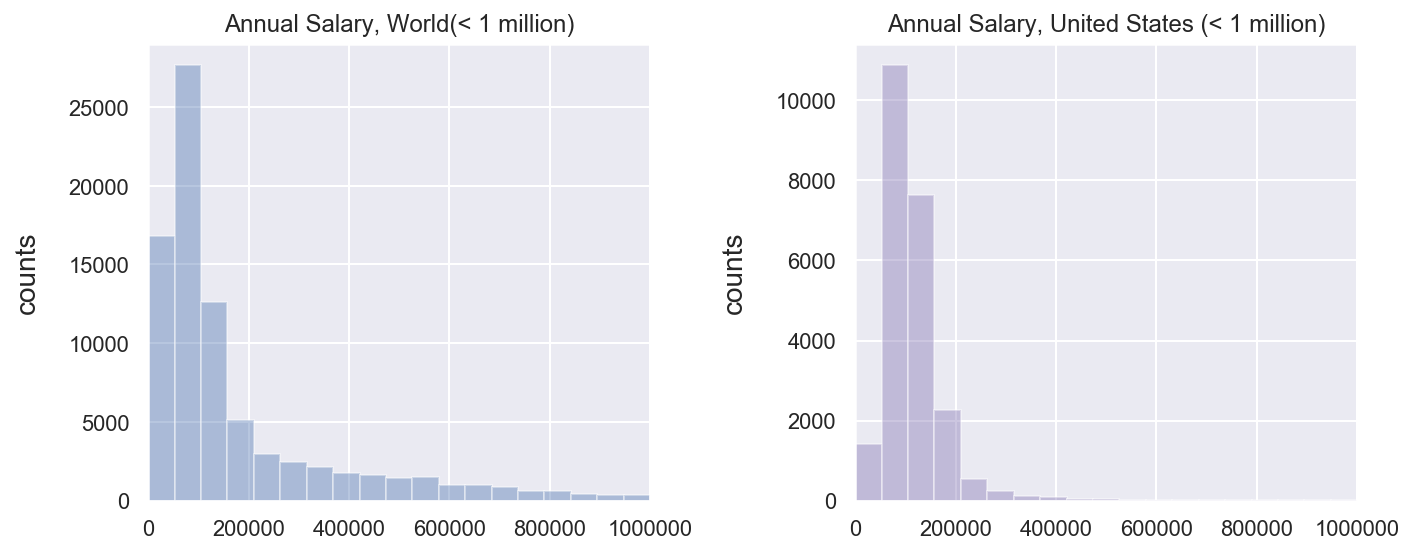

In [3]:
def plot_distribution_salary(salary_annual, i, title, color):
    """
    plot the distribution of the salary
    """
    sns.distplot(salary_annual, bins = np.linspace(0, 1e6, 20), kde=False, ax=ax[i], color = color)
    ax[i].set_ylabel('counts', fontsize = 14, labelpad= 14);
    ax[i].set_title(title)
    ax[i].set_xlim([0, 1e6])
    ax[i].set_xlabel('')

sns.set()
fig, ax = plt.subplots(1,2, figsize=(10, 4))
# world
salary_annual = data[data['is_full_time']]['salary_annual']
plot_distribution_salary(salary_annual, 0, 'Annual Salary, World(< 1 million)', 'b')

# annual salary in United States
salary_annual_US = data[data['is_full_time'] &(data['country']=='United States')]['salary_annual']
plot_distribution_salary(salary_annual_US, 1, 'Annual Salary, United States (< 1 million)', 'm')


# save figure
save_fig('Salary_distribution')
plt.show()

Since the salaries is right-skewed, it is better to compare their median other than mean

In [4]:
# compare the median and 25th 75th quantile
salary_ds = data.loc[data['is_full_time'] & data['is_DS_ML']]['salary_annual']
print('Quantile of data scientist\'s annual salary is:') 
print(salary_ds.quantile([0.25,0.5,0.75]))
salary_dev = data.loc[data['is_full_time'] & data['is_DEV']]['salary_annual']
print('Quantile of developer\'s annual salary is:') 
print(salary_dev.quantile([0.25,0.5,0.75]))

Quantile of data scientist's annual salary is:
0.25     63016.0
0.50    110000.0
0.75    300000.0
Name: salary_annual, dtype: float64
Quantile of developer's annual salary is:
0.25     61225.25
0.50    105000.00
0.75    288576.00
Name: salary_annual, dtype: float64


In [5]:
# obtain the salary data from different countries
def obtain_salary(data, country_name):
    """
    obtain the salary data from different countries in 2019 and 2018
    Input:
    data_2019: dataframe. survey data in 2019
    data_2018: dataframe. survey data in 2018
    country_name: str. the name of the country
    
    Output:
    
    salary_data: dataframe. 
    """
    salary_data = data[(data['is_DEV'] | data['is_DS_ML'] | data['is_DA'])
                       & data['is_full_time']].copy()
    
    # choose the country
    if country_name != 'Global':
        salary_data = salary_data[salary_data['country']== country_name]
    
    # create columns to indicate the professionals: developer, data scientist and data analytics
    salary_data['professional'] = 'DEV'
    salary_data.loc[salary_data['is_DS_ML'],'professional'] = 'DS'
    salary_data.loc[salary_data['is_DA'],'professional']= 'DA'
    
    return salary_data 

In [6]:
# Obtain salary data from each countries
data_world = obtain_salary(data, 'Global')
data_US = obtain_salary(data, 'United States')
data_GM = obtain_salary(data, 'Germany')
data_IN = obtain_salary(data, 'India')
data_UK = obtain_salary(data, 'United Kingdom')
data_CA = obtain_salary(data, 'Canada')

Saving figure Salary_comparsion


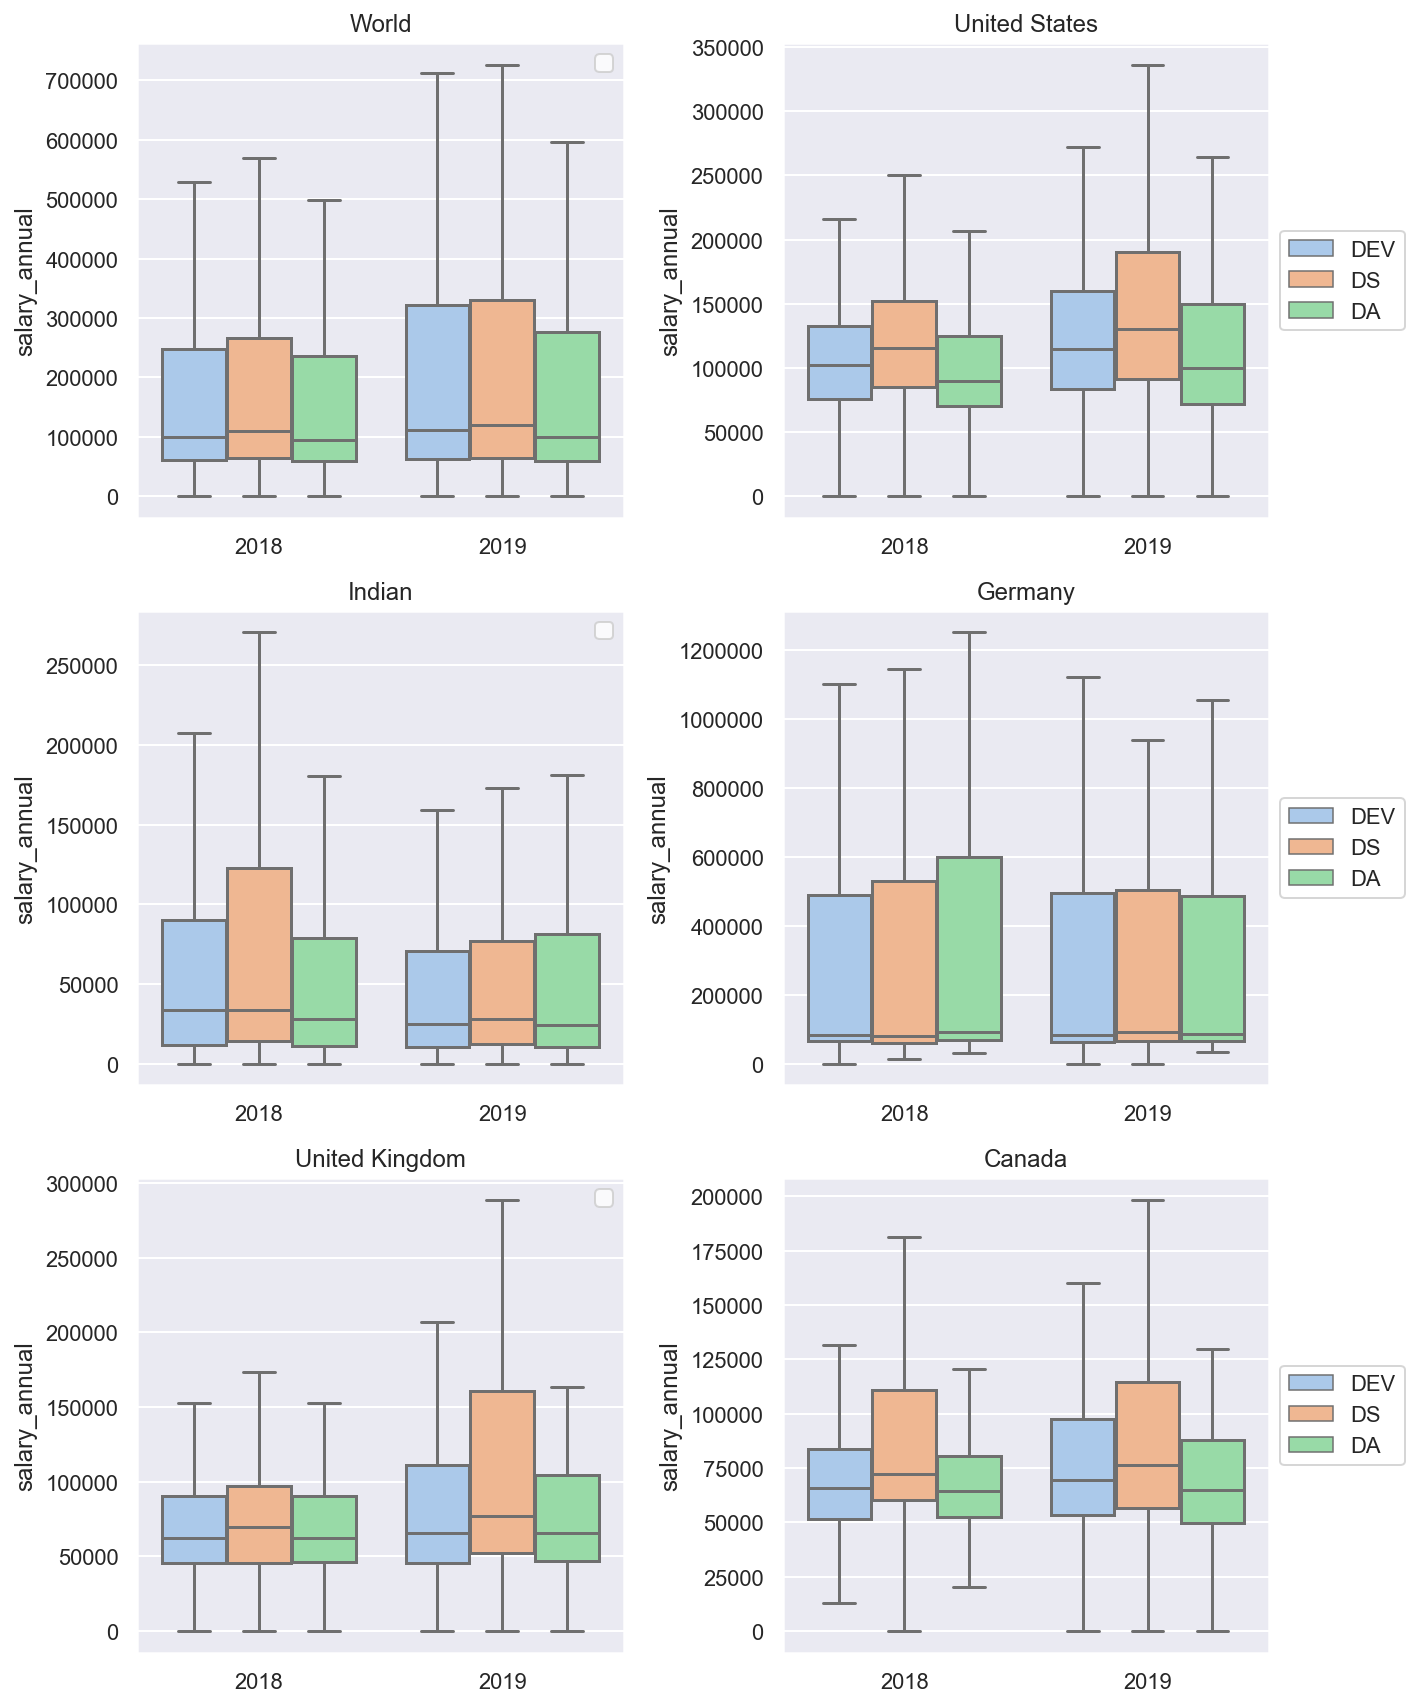

In [7]:
# visualize the comparsion
def plot_salary(data, title, i, j):
    """
    boxplot of salaries of different professionals in 2018 and 2019
    """
    sns.set(palette="pastel", style="ticks")
    hue_order = ['DEV', 'DS', 'DA']
    sns.boxplot(x="year", y="salary_annual", hue='professional', hue_order=hue_order,
            data=data, showfliers=False, ax=ax[i,j])
    if j == 0:
        ax[i,j].legend('')
    else:
        ax[i,j].legend(loc='center left', bbox_to_anchor=(1, 0.5))
    ax[i,j].set_xlabel('')
    ax[i,j].set_title(title)
    
    return


fig, ax = plt.subplots(3, 2, figsize=(10, 12))
sns.set(palette="pastel", style="ticks")

# global
plot_salary(data_world, 'World', 0, 0)

# United States
plot_salary(data_US, 'United States', 0, 1)

# Indian
plot_salary(data_IN, 'Indian', 1, 0)

# Germany
plot_salary(data_GM, 'Germany', 1, 1)

# United Kingdom
plot_salary(data_UK, 'United Kingdom', 2, 0)

# Canada
plot_salary(data_CA, 'Canada', 2, 1)

save_fig('Salary_comparsion')
plt.show()

In [8]:
# print out the 25 percentile, median, 75 percentile of the annual salary
country_list = data_world['country'].value_counts().index.values[:5]
data_1 = data_world[(data_world['country'] == country_list[0])|
                    (data_world['country'] == country_list[1])|
                    (data_world['country'] == country_list[2])|
                    (data_world['country'] == country_list[3])|
                    (data_world['country'] == country_list[4])
                   ]
data_1.groupby(['country','year', 'professional'])['salary_annual'].quantile([0.25,0.5,0.75]).unstack()

0.25      0.50      0.75
country        year professional                             
Canada         2018 DA            52339.0   64417.0   80521.0
                    DEV           51534.0   66027.0   83742.0
                    DS            60391.0   72469.0  110717.0
               2019 DA            49906.5   64888.0   87789.0
                    DEV           53437.0   69468.0   97713.0
                    DS            56490.0   76339.0  114508.0
Germany        2018 DA            67313.0   91791.0  599184.0
                    DEV           66089.0   84448.0  488160.0
                    DS            61194.0   79552.0  528768.0
               2019 DA            66224.0   85931.0  486720.0
                    DEV           63016.0   82494.0  494928.0
                    DS            64735.0   91660.0  503640.0
India          2018 DA            10958.0   28178.0   78912.0
                    DEV           11741.0   33840.0   90144.0
                    DS            14480.5   33840.0  122472.0
               2019 DA            10337.5   24192.0   81648.0
                    DEV           10495.0   25187.0   70560.0
                    DS            12594.0   27986.0   76960.0
United Kingdom 2018 DA            46110.5   62507.0   90288.0
                    DEV           45838.0   62507.0   90288.0
                    DS            45838.0   69452.0   97233.0
               2019 DA            47105.0   65424.0  104678.0
                    DEV           45797.0   65424.0  111220.0
                    DS            52339.0   76742.0  160942.5
United States  2018 DA            70000.0   90000.0  125000.0
                    DEV           76000.0  102000.0  133000.0
                    DS            85000.0  115500.0  152000.0
               2019 DA            72000.0  100000.0  150000.0
                    DEV           83500.0  115000.0  160000.0
                    DS            91187.5  130000.0  190500.0

Question 2.2 Assumption: big company vs small company. big company pays more than small company, and small company doesn't need ds since they don't have much data to analyze. I was wondering is that true?

In [9]:
def plot_salary_company_size(data, title):
    g = sns.catplot(x="year", y="salary_annual",
                    hue="professional", col="company_size", col_order = ['small', 'middle', 'big'],
                    data=data, kind="box", 
                    showfliers=False, hue_order = hue_order = ['DEV', 'DS', 'DA'],
                    height=4, aspect=.8);
    plt.subplots_adjust(top=0.8)
    g.fig.suptitle(title)
    
    return

# world
plot_salary_company_size(data_world, "World")
save_fig('salary_company_size_world', tight_layout=False)


# United States
plot_salary_company_size(data_US, "United States")
save_fig('salary_company_size_US', tight_layout=False)

# Canada
plot_salary_company_size(data_CA, "Canada")


NameError: name 'hue_order' is not defined

To be continue...
How about years of experience?